# Plotting ChIP signal around TSS of DEGs after 24h NipBL while measuring background levels

- adding a split for quantiles of WT expression levels for non-DE genes

In [192]:
import plotting_heatmap_functions as pfn

In [193]:
import pandas as pd
import numpy as np
import bbi
from gffutils.helpers import asinterval
from gtfparse import read_gtf
import bioframe as bf
import matplotlib.pyplot as plt

In [194]:
# Importing day 1 depletion in ESCs DEGS

proj = "/project/fudenber_735/collaborations/karissa_2022/20220812_EA18-1_RNAseq-Analysis_forGeoff/"

day1_sigRes = 'EA18.1_ESC_1d-depletion_DESeq2/20220817_EA18-1_resSig_ESC_1d-depletion.csv'

normalized_counts = 'EA18.1_ESC_1d-depletion_DESeq2/20220817_EA18-1_ESC-1d_sf-normalized.csv'

vst_normalized_counts = 'EA18.1_ESC_1d-depletion_DESeq2/20220817_EA18-1_ESC-1d_sf-normalized_vst-transformed.csv'

feature_counts = '20220816_featureCounts.csv'

WT_samples = ['KHRNA1', 'KHRNA7', 'KHRNA13', 'KHRNA22', 'KHRNA23', 'KHRNA50']

In [195]:
day1_res_df = pd.read_csv(proj+day1_sigRes)

In [196]:
day1_res_df

,Geneid,SYMBOL,log2FoldChange,padj,baseMean
0,ENSMUSG00000025128.7,Bhlhe22,-4.479336,4.277827e-03,7.794735
1,ENSMUSG00000051314.11,Ffar2,-3.910856,3.800000e-06,31.133503
2,ENSMUSG00000057182.15,Scn3a,-3.806326,5.010000e-18,144.877936
3,ENSMUSG00000047495.15,Dlgap2,-3.530066,4.213601e-03,9.073752
4,ENSMUSG00000034310.8,Tmem132d,-3.518345,3.690000e-10,63.300332
...,...,...,...,...,...
1614,ENSMUSG00000020826.9,Nos2,3.533920,7.987690e-04,9.674001
1615,ENSMUSG00000010080.15,Epn3,3.822547,2.040000e-08,18.206916
1616,ENSMUSG00000061353.11,Cxcl12,4.706828,1.610000e-05,9.619308
1617,ENSMUSG00000036744.13,Olfr701,5.052035,1.740000e-05,11.999807


importing the rest of the feature counts to collect the set of non-significantly DE genes

In [197]:
feat_counts_df = pd.read_csv(proj+feature_counts)

In [198]:
day1_res_df = day1_res_df.merge(feat_counts_df[['Geneid'] + WT_samples], how='outer')

In [199]:
day1_res_df.shape

(55421, 11)

In [200]:
day1_res_df['avg_Counts'] = day1_res_df[WT_samples].mean(axis='columns')

In [201]:
day1_res_df.drop(columns=WT_samples)

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,avg_Counts
0,ENSMUSG00000025128.7,Bhlhe22,-4.479336,4.277827e-03,7.794735,11.166667
1,ENSMUSG00000051314.11,Ffar2,-3.910856,3.800000e-06,31.133503,28.333333
2,ENSMUSG00000057182.15,Scn3a,-3.806326,5.010000e-18,144.877936,150.666667
3,ENSMUSG00000047495.15,Dlgap2,-3.530066,4.213601e-03,9.073752,13.166667
4,ENSMUSG00000034310.8,Tmem132d,-3.518345,3.690000e-10,63.300332,67.833333
...,...,...,...,...,...,...
55416,ENSMUSG00000095523.1,NaN,NaN,NaN,NaN,0.000000
55417,ENSMUSG00000095475.1,NaN,NaN,NaN,NaN,0.000000
55418,ENSMUSG00000094855.1,NaN,NaN,NaN,NaN,0.000000
55419,ENSMUSG00000095019.1,NaN,NaN,NaN,NaN,0.000000


Using vst-normalized gene counts

In [202]:
norm_counts_df = pd.read_csv(proj+vst_normalized_counts)
norm_counts_df = norm_counts_df.rename(columns={'Unnamed: 0' : 'Geneid'})
day1_res_df = day1_res_df.merge(norm_counts_df[['Geneid'] + WT_samples], how='left')

/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/pandas/core/reshape/merge.py:1215: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  warnings.warn(


In [203]:
day1_res_df['avg_norm_Counts'] = day1_res_df[WT_samples].mean(axis='columns')

In [204]:
day1_res_df.drop(columns=WT_samples)

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,avg_Counts,avg_norm_Counts
0,ENSMUSG00000025128.7,Bhlhe22,-4.479336,4.277827e-03,7.794735,11.166667,11.166667
1,ENSMUSG00000051314.11,Ffar2,-3.910856,3.800000e-06,31.133503,28.333333,28.333333
2,ENSMUSG00000057182.15,Scn3a,-3.806326,5.010000e-18,144.877936,150.666667,150.666667
3,ENSMUSG00000047495.15,Dlgap2,-3.530066,4.213601e-03,9.073752,13.166667,13.166667
4,ENSMUSG00000034310.8,Tmem132d,-3.518345,3.690000e-10,63.300332,67.833333,67.833333
...,...,...,...,...,...,...,...
55416,ENSMUSG00000095523.1,NaN,NaN,NaN,NaN,0.000000,0.000000
55417,ENSMUSG00000095475.1,NaN,NaN,NaN,NaN,0.000000,0.000000
55418,ENSMUSG00000094855.1,NaN,NaN,NaN,NaN,0.000000,0.000000
55419,ENSMUSG00000095019.1,NaN,NaN,NaN,NaN,0.000000,0.000000


Getting the TSSes 

Note: assuming that the RNA-seq alignment is still being done via STAR method from 

In [205]:
# Getting TSSEs
tss_df = read_gtf("/project/fudenber_735/collaborations/karissa_2022/old/RNAseq/STAR_Gencode_alignment/tss_annotions_gencode.vM23.primary_assembly.gtf")

/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
/home1/pokorny/.conda/envs/bioenv/lib/python3.9/site-packages/gtfparse/read_gtf.py:82: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  chunk_iterator = pd.read_csv(
INFO:root:Extracted GTF attributes: ['gene_id', 'transcript_id', 'gene_type', 'gene_name', 'transcript_type', 'transcript_name', 'level', 'transcript_support_level', 'mgi_id', 'tag', 'havana_gene', 'havana_transcript', 'protein_id', 'ccdsid', 'ont']


In [206]:
# cleaning out less-well defined chromosome numbers
tss_df = tss_df.loc[False==( tss_df['seqname'].str.contains('NT_'))]
tss_df = tss_df.loc[False==( tss_df['seqname'].str.contains('MT'))]

# paste 'chr' to all chromosome names
tss_df["seqname"] = tss_df["seqname"]

# rename column to chrom to match bedframe/bioframe format
tss_df = tss_df.rename(columns= {"seqname" : "chrom"})

# Removing pseudo chromosomes
before = len(tss_df)
tss_df = tss_df.loc[False==( tss_df['chrom'].str.contains('chrGL'))]
tss_df = tss_df.loc[False==( tss_df['chrom'].str.contains('chrJH'))]
tss_df = tss_df.loc[False==( tss_df['chrom'].str.contains('chrX'))]
tss_df = tss_df.loc[False==( tss_df['chrom'].str.contains('chrY'))]
tss_df = tss_df.loc[False==( tss_df['chrom'].str.contains('chrM'))]
tss_df =tss_df.loc[True==tss_df['chrom'].str.contains('chr')]
after = len(tss_df)

In [207]:
tss_df['chrom'].value_counts()

chr7     12506
chr2     10932
chr5      9006
chr11     8700
chr1      8579
chr9      8080
chr6      7888
chr4      7640
chr17     7098
chr3      6977
chr10     6605
chr8      6455
chr14     5873
chr13     5644
chr12     5371
chr15     5157
chr16     4514
chr19     4339
chr18     3573
Name: chrom, dtype: int64

In [208]:
# drop duplicate TSSes
ts_intervals = tss_df[['gene_id','chrom', 'start', 'end']].drop_duplicates(['gene_id'])

In [209]:
day1_res_df

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,KHRNA1,KHRNA7,KHRNA13,KHRNA22,KHRNA23,KHRNA50,avg_Counts,avg_norm_Counts
0,ENSMUSG00000025128.7,Bhlhe22,-4.479336,4.277827e-03,7.794735,6,4,3,24,25,5,11.166667,11.166667
1,ENSMUSG00000051314.11,Ffar2,-3.910856,3.800000e-06,31.133503,18,18,12,18,45,59,28.333333,28.333333
2,ENSMUSG00000057182.15,Scn3a,-3.806326,5.010000e-18,144.877936,161,100,97,180,175,191,150.666667,150.666667
3,ENSMUSG00000047495.15,Dlgap2,-3.530066,4.213601e-03,9.073752,11,7,7,21,27,6,13.166667,13.166667
4,ENSMUSG00000034310.8,Tmem132d,-3.518345,3.690000e-10,63.300332,83,66,68,50,70,70,67.833333,67.833333
...,...,...,...,...,...,...,...,...,...,...,...,...,...
55416,ENSMUSG00000095523.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000
55417,ENSMUSG00000095475.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000
55418,ENSMUSG00000094855.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000
55419,ENSMUSG00000095019.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000


In [210]:
ts_intervals

,gene_id,chrom,start,end
0,ENSMUSG00000102693.1,chr1,3073252,3073252
1,ENSMUSG00000064842.1,chr1,3102015,3102015
2,ENSMUSG00000051951.5,chr1,3216345,3216345
5,ENSMUSG00000102851.1,chr1,3252756,3252756
6,ENSMUSG00000103377.1,chr1,3368550,3368550
...,...,...,...,...
134932,ENSMUSG00000117740.1,chr19,61232927,61232927
134933,ENSMUSG00000117782.1,chr19,61255966,61255966
134934,ENSMUSG00000117951.1,chr19,61257790,61257790
134935,ENSMUSG00000095993.1,chr19,61297070,61297070


In [211]:
# drop gene from data field if there is no change associated
# day1_res_df.dropna(subset=['log2FoldChange'], inplace=True)
day1_res_df = day1_res_df.merge(ts_intervals, left_on='Geneid', right_on='gene_id', how='left')

In [212]:
day1_res_df.head(3)

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,KHRNA1,KHRNA7,KHRNA13,KHRNA22,KHRNA23,KHRNA50,avg_Counts,avg_norm_Counts,gene_id,chrom,start,end
0,ENSMUSG00000025128.7,Bhlhe22,-4.479336,4.277827e-03,7.794735,6,4,3,24,25,5,11.166667,11.166667,ENSMUSG00000025128.7,chr3,18054173.0,18054173.0
1,ENSMUSG00000051314.11,Ffar2,-3.910856,3.800000e-06,31.133503,18,18,12,18,45,59,28.333333,28.333333,ENSMUSG00000051314.11,chr7,30823776.0,30823776.0
2,ENSMUSG00000057182.15,Scn3a,-3.806326,5.010000e-18,144.877936,161,100,97,180,175,191,150.666667,150.666667,ENSMUSG00000057182.15,chr2,65567493.0,65567493.0


In [213]:
# Checking if any of the significant genes will be lost due to loss of TSS annotation
print("Checking for 'lost' significant genes: ")
ix = np.where(day1_res_df['start'].isna() & (day1_res_df['padj'] < 0.05))
print("lost: ", str(day1_res_df.iloc[ix].shape[0]))

# If could not find a TSS, drop entire row
day1_res_df.dropna(subset=['start'], inplace=True)

Checking for 'lost' significant genes: 
lost:  55


In [214]:
day1_res_df = bf.sanitize_bedframe(day1_res_df)

In [215]:
day1_res_df['log2FoldChange'].tail(1).isna()

51164    True
Name: log2FoldChange, dtype: bool

Let's look at the values for counts of the genes that do not make the pval cutoff of 0.05:

In [216]:
cutoff_col = 'padj'
pval_cutoff = 0.05

In [217]:
day1_res_df[day1_res_df[cutoff_col].isna()]

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,KHRNA1,KHRNA7,KHRNA13,KHRNA22,KHRNA23,KHRNA50,avg_Counts,avg_norm_Counts,gene_id,chrom,start,end
1619,ENSMUSG00000102693.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000,ENSMUSG00000102693.1,chr1,3073252,3073252
1620,ENSMUSG00000064842.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000,ENSMUSG00000064842.1,chr1,3102015,3102015
1621,ENSMUSG00000051951.5,NaN,NaN,NaN,NaN,0,0,0,0,0,1,0.166667,0.166667,ENSMUSG00000051951.5,chr1,3216345,3216345
1622,ENSMUSG00000102851.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000,ENSMUSG00000102851.1,chr1,3252756,3252756
1623,ENSMUSG00000103377.1,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0.000000,0.000000,ENSMUSG00000103377.1,chr1,3368550,3368550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51160,ENSMUSG00000117740.1,NaN,NaN,NaN,NaN,0,0,1,0,0,0,0.166667,0.166667,ENSMUSG00000117740.1,chr19,61232927,61232927
51161,ENSMUSG00000117782.1,NaN,NaN,NaN,NaN,0,0,0,0,1,0,0.166667,0.166667,ENSMUSG00000117782.1,chr19,61255966,61255966
51162,ENSMUSG00000117951.1,NaN,NaN,NaN,NaN,4,5,1,3,2,1,2.666667,2.666667,ENSMUSG00000117951.1,chr19,61257790,61257790
51163,ENSMUSG00000095993.1,NaN,NaN,NaN,NaN,5,3,7,25,17,33,15.000000,15.000000,ENSMUSG00000095993.1,chr19,61297070,61297070


In [218]:
percentiles = [25, 50, 75, 80, 90, 100]
print(np.percentile(day1_res_df[day1_res_df[cutoff_col].isna()]['avg_Counts'], percentiles))

[0.00000000e+00 5.00000000e-01 2.08333333e+01 6.81666667e+01
 7.76333333e+02 2.02678333e+05]


In [219]:
def label_DE_status_deseq2(gene_row):
    
    cutoff_col = 'padj'
    pval_cutoff = 0.05
    de_value_col = 'log2FoldChange'
    
    if gene_row[cutoff_col] < pval_cutoff:
        if gene_row[de_value_col] < 0:
            return 'down'
        else:
            return 'up'
    else:
        if gene_row['avg_Counts'] <= 0:
            return 'nonsig_25'
        elif gene_row['avg_Counts'] <= 5e-01:
            return 'nonsig_50'
        elif gene_row['avg_Counts'] <= 2.0833e+01:
            return 'nonsig_75'
        elif gene_row['avg_Counts'] <= 6.8166e+01:
            return 'nonsig_80'
        elif gene_row['avg_Counts'] <= 7.7633e+02:
            return 'nonsig_90'
        else:
            return 'nonsig_100'

In [220]:
day1_res_df['DE_status'] = day1_res_df.apply(lambda row: label_DE_status_deseq2(row), axis=1)

In [221]:
day1_res_df.tail(3)

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,KHRNA1,KHRNA7,KHRNA13,KHRNA22,KHRNA23,KHRNA50,avg_Counts,avg_norm_Counts,gene_id,chrom,start,end,DE_status
51162,ENSMUSG00000117951.1,NaN,NaN,NaN,NaN,4,5,1,3,2,1,2.666667,2.666667,ENSMUSG00000117951.1,chr19,61257790,61257790,nonsig_75
51163,ENSMUSG00000095993.1,NaN,NaN,NaN,NaN,5,3,7,25,17,33,15.000000,15.000000,ENSMUSG00000095993.1,chr19,61297070,61297070,nonsig_75
51164,ENSMUSG00000118197.1,NaN,NaN,NaN,NaN,18,17,12,29,18,20,19.000000,19.000000,ENSMUSG00000118197.1,chr19,61305281,61305281,nonsig_75


Check to make sure this grouping by percentiles made sense/worked

In [222]:
day1_res_df['DE_status'].value_counts()

nonsig_25     18784
nonsig_75     12221
nonsig_50      6153
nonsig_90      4956
nonsig_100     4955
nonsig_80      2477
up              837
down            727
Name: DE_status, dtype: int64

In [223]:
day1_res_df[day1_res_df['DE_status'] == 'nonsig_90'][0:3]

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,KHRNA1,KHRNA7,KHRNA13,KHRNA22,KHRNA23,KHRNA50,avg_Counts,avg_norm_Counts,gene_id,chrom,start,end,DE_status
1649,ENSMUSG00000103922.1,NaN,NaN,NaN,NaN,223,198,119,307,280,194,220.166667,220.166667,ENSMUSG00000103922.1,chr1,4771130,4771130,nonsig_90
1687,ENSMUSG00000103509.1,NaN,NaN,NaN,NaN,112,12,129,281,422,411,227.833333,227.833333,ENSMUSG00000103509.1,chr1,7148109,7148109,nonsig_90
1725,ENSMUSG00000025912.16,NaN,NaN,NaN,NaN,384,187,331,844,840,719,550.833333,550.833333,ENSMUSG00000025912.16,chr1,9700210,9700210,nonsig_90


In [224]:
day1_res_df[day1_res_df['DE_status'] == 'nonsig_100'][0:3]

,Geneid,SYMBOL,log2FoldChange,padj,baseMean,KHRNA1,KHRNA7,KHRNA13,KHRNA22,KHRNA23,KHRNA50,avg_Counts,avg_norm_Counts,gene_id,chrom,start,end,DE_status
1650,ENSMUSG00000033845.13,NaN,NaN,NaN,NaN,3061,3013,2221,7135,5526,3226,4030.333333,4030.333333,ENSMUSG00000033845.13,chr1,4785711,4785711,nonsig_100
1652,ENSMUSG00000025903.14,NaN,NaN,NaN,NaN,1158,763,866,2294,2706,2407,1699.000000,1699.000000,ENSMUSG00000025903.14,chr1,4807787,4807787,nonsig_100
1661,ENSMUSG00000033793.12,NaN,NaN,NaN,NaN,1055,962,789,2389,2037,1655,1481.166667,1481.166667,ENSMUSG00000033793.12,chr1,5070017,5070017,nonsig_100


any rows left that are just labeled nonsig?

## Generating average Chip-signal plots with lines for all percentiles

In [225]:
# Load Chip-Seq files 
chip_folder = "/project/fudenber_735/collaborations/karissa_2022/2022_09_features_for_RNAseq/ChIP-seq_in_WT-parental-E14/"

ctcf_new = "CTCF_E14_RSC13new-22-37-60_average.bw"
rad21 = "RAD21_E14_RSC12new-21-36-59-74_average.bw"
nipbl = "NIPBL_E14_EA112-EA175_average.bw"
ring1b = "RING1B_E14_RSC24-39-62_average.bw"
promoter = "H3K27Ac_mESCs_EA92-EA94_average.bw"

In [226]:
chip_seq_condition_dict = {'CTCF' : chip_folder+ctcf_new, 'RAD21' : chip_folder+rad21,
                           'NiBL' : chip_folder+nipbl, 'RING1B' : chip_folder+ring1b,
                           'H3K27ac' : chip_folder+promoter}

### test: generate one plot firts for CTCF

In [227]:
cond = 'CTCF'

matrix = pfn.generate_signal_matrix(
                                day1_res_df,
                                chip_seq_condition_dict[cond]
                               )

In [228]:
categories = ['up', 'down', 'nonsig_25', 
              'nonsig_50', 'nonsig_75', 
              'nonsig_80', 'nonsig_90', 
              'nonsig_100']
colors = ['r', 'b', '#ffffff','#f0f0f0','#d9d9d9','#bdbdbd','#969696','#737373','#525252','#252525','#000000']

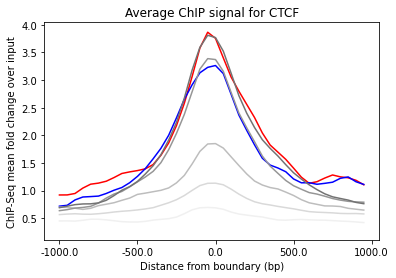

In [229]:
    
pfn.plot_avg_signal(day1_res_df, 
                    matrix, 
                    'Average ChIP signal for {}'.format(cond), 
                    ax=None, 
                    DE_value_col='log2Fold_Change',
                    agg_key='DE_status', 
                    agg_categories=categories, 
                    color_categories=colors, 
                    window_size=1000, 
                    nbins=40)

# Generate average signal plots for all proteins

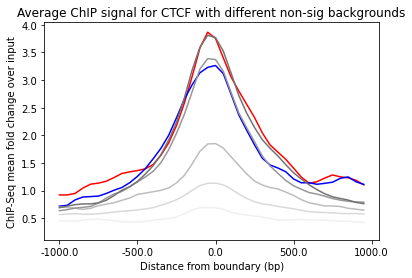

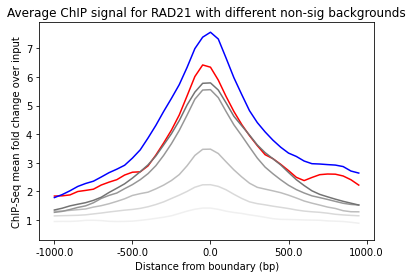

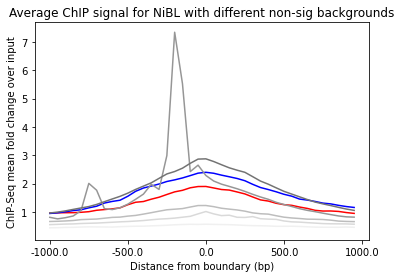

In [ ]:
# Plot for all categories
for cond, chip_file in chip_seq_condition_dict.items():
    

    matrix = pfn.generate_signal_matrix(day1_res_df, 
                                chip_file)
    
    pfn.plot_avg_signal(day1_res_df, 
                    matrix, 
                    'Average ChIP signal for {} with different non-sig backgrounds'.format(cond), 
                    ax=None, 
                    DE_value_col='log2Fold_Change',
                    agg_key='DE_status', 
                    agg_categories=categories, 
                    color_categories=colors, 
                    window_size=1000, 
                    nbins=40)
    
    plt.show()
